In [1]:
import pickle
import os
from hyperopt.plotting import *
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials, base
import pandas as pd
import numpy as np
import time
from collections import defaultdict


from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline


import pprint

import matplotlib as mpl
import seaborn as sns



sns.set_color_codes()
sns.set_context("paper")
sns.set(rc={"font.size":18,"axes.labelsize":22})
sns.set(font_scale=1.7)
sns.set_style("white")
sns.despine()

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


<Figure size 432x288 with 0 Axes>

In [2]:
dataset_name = 'GermEval-2017'
#dataset_name = 'Organic-Coarse'

if dataset_name == 'GermEval-2017':
    ds_short = 'ge'
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_GermEvalHyperoptRuns.pkl')
else:
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_OrganicCoarseHyperopt.pkl')
    ds_short = 'og'

with open(path, 'rb') as f:
    trials = pickle.load(f)
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': 0.19726594745884451,
   'status': 'ok',
   'eval_time': 1974.1810450553894,
   'best_loss': 0.19726594745884451,
   'best_f1': 0.3237704918032787,
   'sample_iterations': 119364,
   'iterations': 1764,
   'rc': <misc.run_configuration.RunConfiguration at 0x1a1a755a58>,
   'results': {'train': {'loss': 0.2145883219079347,
     'f1': 0.31460039536853995},
    'validation': {'loss': 0.19726594745884451, 'f1': 0.3237704918032787},
    'test': {'loss': 0.2138178118566209, 'f1': 0.286335628851033}}},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'adam_beta1': [0],
    'adam_beta2': [0],
    'adam_eps': [0],
    'adam_learning_rate': [0],
    'adam_weight_decay': [0],
    'batch_size': [0],
    'clip_comments_to': [0],
    'dropout_rate': [0],
    'embedding_dim': [0],
    'embedding_name': [0],
    'embedding_type': [0],
    'harmonize_bahn': [0],
    'last_layer_dropout'

# Convert to pandas

In [3]:
pd_dict_ens = {
    'hyperopt iteration': range(len(trials.results)),
    'status': trials.statuses(),
    'time': [r['eval_time'] for r in trials.results],
    'iterations': [r['eval_time'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'train loss': [r['results']['train']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results],
    'train f1': [r['results']['train']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'validation f1': [r['results']['validation']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'validation loss': [r['results']['validation']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results],
    'test f1': [r['results']['test']['f1'] if r['status'] == STATUS_OK else 0 for r in trials.results],
    'test loss': [r['results']['test']['loss'] if r['status'] == STATUS_OK else np.nan for r in trials.results]
}

In [4]:
df_ens = pd.DataFrame(pd_dict_ens)
df_ens

,hyperopt iteration,status,time,iterations,train loss,train f1,validation f1,validation loss,test f1,test loss
0,0,ok,1974.181045,1974.181045,0.214588,0.314600,0.323770,0.197266,0.286336,0.213818
1,1,ok,1935.397286,1935.397286,0.587789,0.377256,0.377432,0.583690,0.330922,0.592671
2,2,ok,2764.803079,2764.803079,0.112538,0.267117,0.249136,0.129504,0.212655,0.146711
3,3,ok,2611.593660,2611.593660,0.198166,0.246839,0.241784,0.197494,0.218425,0.201316
4,4,ok,1692.865100,1692.865100,2.644062,0.377302,0.382055,1.519115,0.319838,3.124750
5,5,fail,15.958375,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
6,6,ok,427.220645,427.220645,0.199593,0.371445,0.372308,0.186750,0.314898,0.187639
7,7,ok,1529.108093,1529.108093,0.195286,0.270401,0.276688,0.181278,0.242629,0.183461
8,8,ok,413.036618,413.036618,0.229184,0.290891,0.292419,0.204257,0.258432,0.211880
9,9,ok,1284.090815,1284.090815,0.134985,0.347384,0.343919,0.151344,0.305556,0.167207


In [5]:
pd_dict_sing = {
    'hyperopt iteration': [],
    'status': [],
    'split': [],
    'loss': [],
    'f1': [],
    'time': [],
    'algorithm': []
}
for i, r in enumerate(trials.results):
    for s in ['train', 'validation', 'test']:
        pd_dict_sing['algorithm'].append('TPE')
        pd_dict_sing['time'].append(r['eval_time'])
        pd_dict_sing['hyperopt iteration'].append(i)
        pd_dict_sing['status'].append(r['status'])
        pd_dict_sing['split'].append(s)
        if r['status'] == STATUS_OK:
            pd_dict_sing['loss'].append(r['results'][s]['loss'])
            pd_dict_sing['f1'].append(r['results'][s]['f1'])
        else:
            pd_dict_sing['loss'].append(np.nan)
            pd_dict_sing['f1'].append(np.nan)
df_sing = pd.DataFrame(pd_dict_sing)
df_sing

,hyperopt iteration,status,split,loss,f1,time,algorithm
0,0,ok,train,0.214588,0.314600,1974.181045,TPE
1,0,ok,validation,0.197266,0.323770,1974.181045,TPE
2,0,ok,test,0.213818,0.286336,1974.181045,TPE
3,1,ok,train,0.587789,0.377256,1935.397286,TPE
4,1,ok,validation,0.583690,0.377432,1935.397286,TPE
5,1,ok,test,0.592671,0.330922,1935.397286,TPE
6,2,ok,train,0.112538,0.267117,2764.803079,TPE
7,2,ok,validation,0.129504,0.249136,2764.803079,TPE
8,2,ok,test,0.146711,0.212655,2764.803079,TPE
9,3,ok,train,0.198166,0.246839,2611.593660,TPE


In [6]:
fig_save_path = os.path.join(os.getcwd(), 'Thesis', 'figures', '06_results')
df_filter = (df_sing['split'] == 'test')|(df_sing['split'] == 'validation')
df_random_filter = df_sing['hyperopt iteration'] > 9

# Losses over time

<Figure size 1440x720 with 0 Axes>

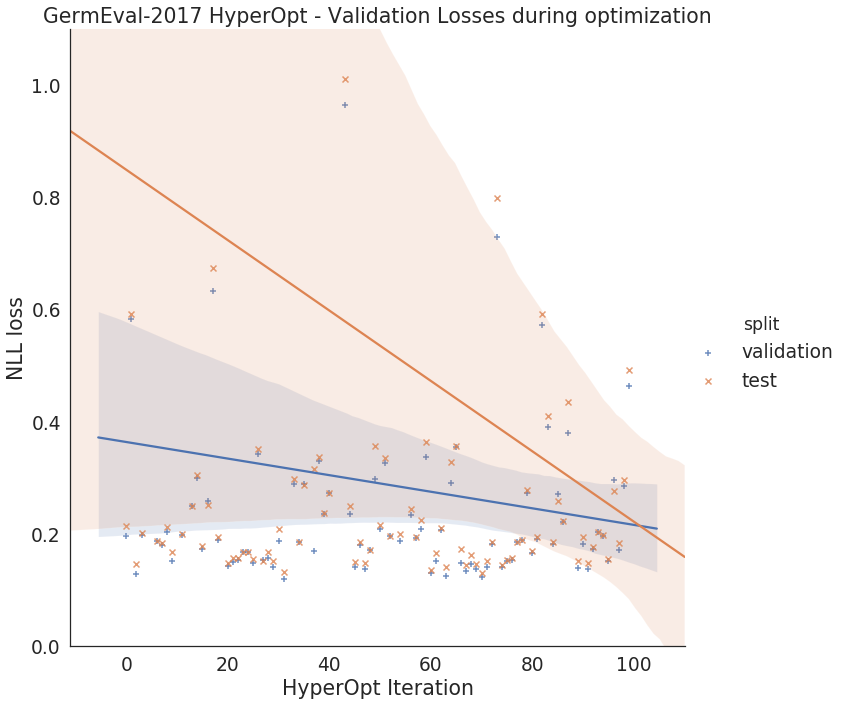

In [242]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='hyperopt iteration', y='loss', height=10, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter])
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title(f'{dataset_name} HyperOpt - Validation Losses during optimization')

plt.ylabel('NLL loss')
plt.xlabel('HyperOpt Iteration')
sns.despine()
plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

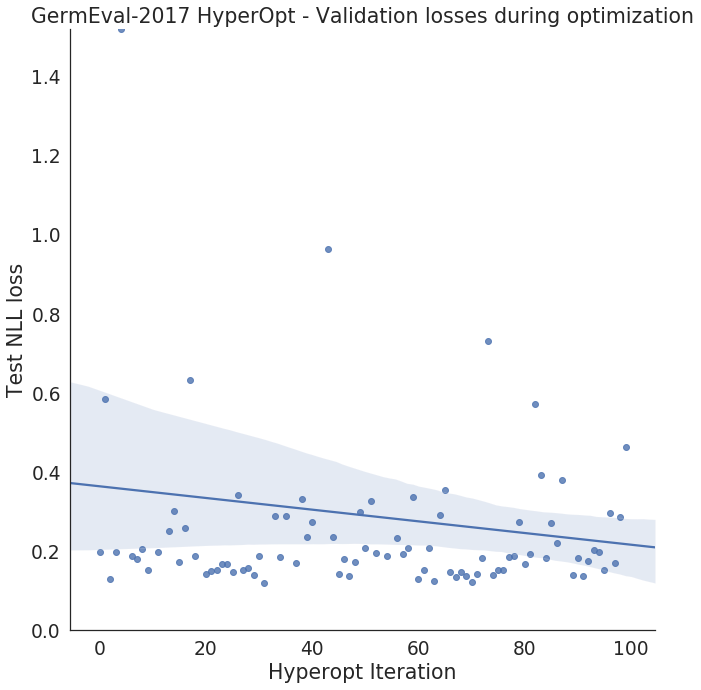

In [243]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration_validation.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='hyperopt iteration', y='validation loss', height=10, aspect=1, data=df_ens)
plt.title(f'{dataset_name} HyperOpt - Validation losses during optimization')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Test NLL loss')
plt.xlabel('Hyperopt Iteration')
sns.despine()
plt.tight_layout()
plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

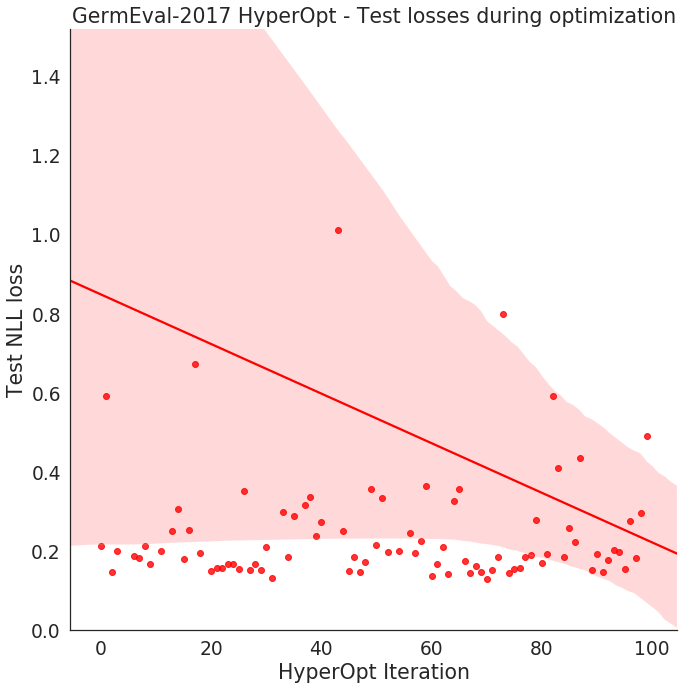

In [244]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-iteration_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='hyperopt iteration', y='test loss', height=10, aspect=1, data=df_ens, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.title(f'{dataset_name} HyperOpt - Test losses during optimization')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Test NLL loss')
plt.xlabel('HyperOpt Iteration')
sns.despine()
plt.tight_layout()
plt.savefig(fn)

### Significance test

In [115]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#### Validation Loss Significance

In [116]:
y = [r['results']['validation']['loss'] for r in trials.results if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8307
Date:                 Do, 25 Apr 2019   Prob (F-statistic):              0.365
Time:                        10:51:17   Log-Likelihood:                -51.223
No. Observations:                  90   AIC:                             106.4
Df Residuals:                      88   BIC:                             111.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3598      0.090      3.980      0.0

In [117]:
print(est2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y        & \textbf{  R-squared:         } &     0.009   \\
\textbf{Model:}            &       OLS       & \textbf{  Adj. R-squared:    } &    -0.002   \\
\textbf{Method:}           &  Least Squares  & \textbf{  F-statistic:       } &    0.8307   \\
\textbf{Date:}             & Do, 25 Apr 2019 & \textbf{  Prob (F-statistic):} &    0.365    \\
\textbf{Time:}             &     10:51:18    & \textbf{  Log-Likelihood:    } &   -51.223   \\
\textbf{No. Observations:} &          90     & \textbf{  AIC:               } &     106.4   \\
\textbf{Df Residuals:}     &          88     & \textbf{  BIC:               } &     111.4   \\
\textbf{Df Model:}         &           1     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{

#### Test Loss Significance

In [118]:
y = [r['results']['test']['loss'] for r in trials.results if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4930
Date:                 Do, 25 Apr 2019   Prob (F-statistic):              0.484
Time:                        10:51:18   Log-Likelihood:                -206.16
No. Observations:                  90   AIC:                             416.3
Df Residuals:                      88   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8356      0.506      1.653      0.1

In [119]:
print(est2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y        & \textbf{  R-squared:         } &     0.006   \\
\textbf{Model:}            &       OLS       & \textbf{  Adj. R-squared:    } &    -0.006   \\
\textbf{Method:}           &  Least Squares  & \textbf{  F-statistic:       } &    0.4930   \\
\textbf{Date:}             & Do, 25 Apr 2019 & \textbf{  Prob (F-statistic):} &    0.484    \\
\textbf{Time:}             &     10:51:18    & \textbf{  Log-Likelihood:    } &   -206.16   \\
\textbf{No. Observations:} &          90     & \textbf{  AIC:               } &     416.3   \\
\textbf{Df Residuals:}     &          88     & \textbf{  BIC:               } &     421.3   \\
\textbf{Df Model:}         &           1     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$>$$|$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{

#### OLS for test F1 improvement

In [120]:
y = [r['results']['test']['f1'] for r in trials.results[10:] if r['status'] == STATUS_OK]
X = range(len(y))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9215
Date:                 Do, 25 Apr 2019   Prob (F-statistic):              0.340
Time:                        10:51:19   Log-Likelihood:                 109.77
No. Observations:                  81   AIC:                            -215.5
Df Residuals:                      79   BIC:                            -210.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2611      0.014     18.766      0.0

## F1 Score over time

<Figure size 1440x864 with 0 Axes>

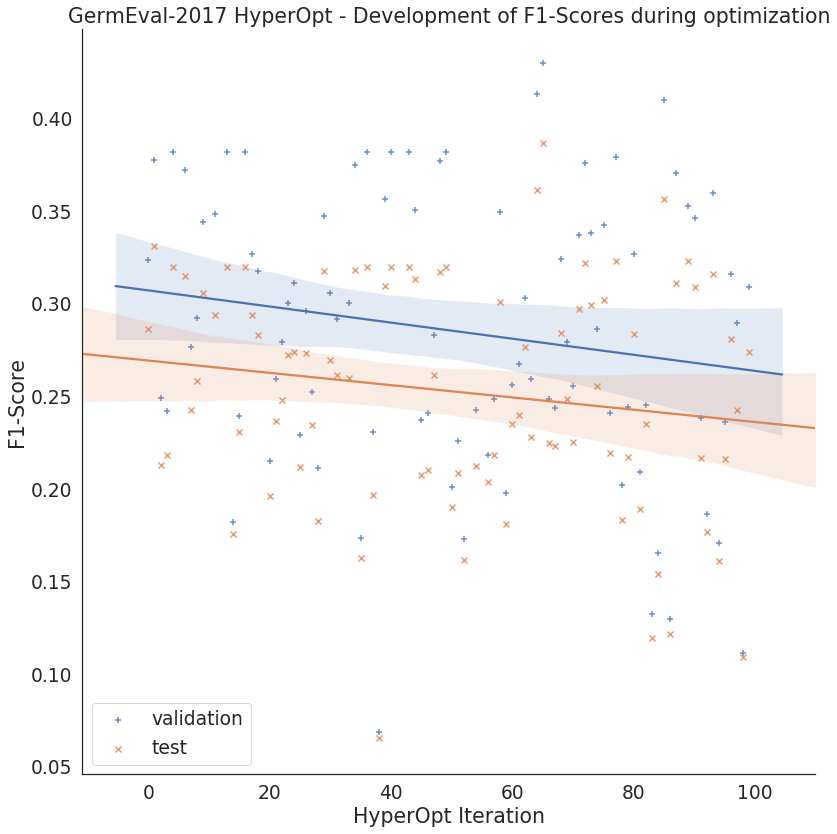

In [245]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_f1time.pdf')
plt.figure(figsize=(20,12))


sns.lmplot(x='hyperopt iteration', y='f1', height=12, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter], legend=False)
axes = plt.gca()
plt.title(f'{dataset_name} HyperOpt - Development of F1-Scores during optimization')
plt.legend(loc='lower left')

sns.despine()
plt.ylabel('F1-Score')
plt.xlabel('HyperOpt Iteration')
plt.tight_layout()
plt.savefig(fn)

## How well does the loss correspond to the f1 score

<Figure size 1440x720 with 0 Axes>

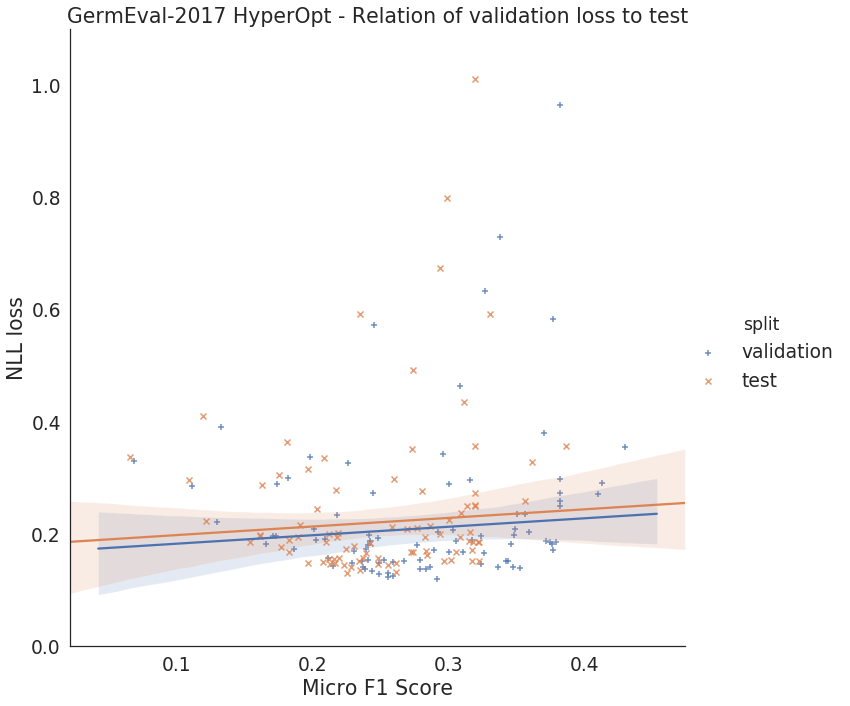

In [246]:

fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_loss-f1.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='f1', y='loss', height=10, aspect=1, hue='split', markers=['+', 'x'], data=df_sing[df_filter], robust=True)
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title(f'{dataset_name} HyperOpt - Relation of validation loss to test')


plt.ylabel('NLL loss')
plt.xlabel('Micro F1 Score')


plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

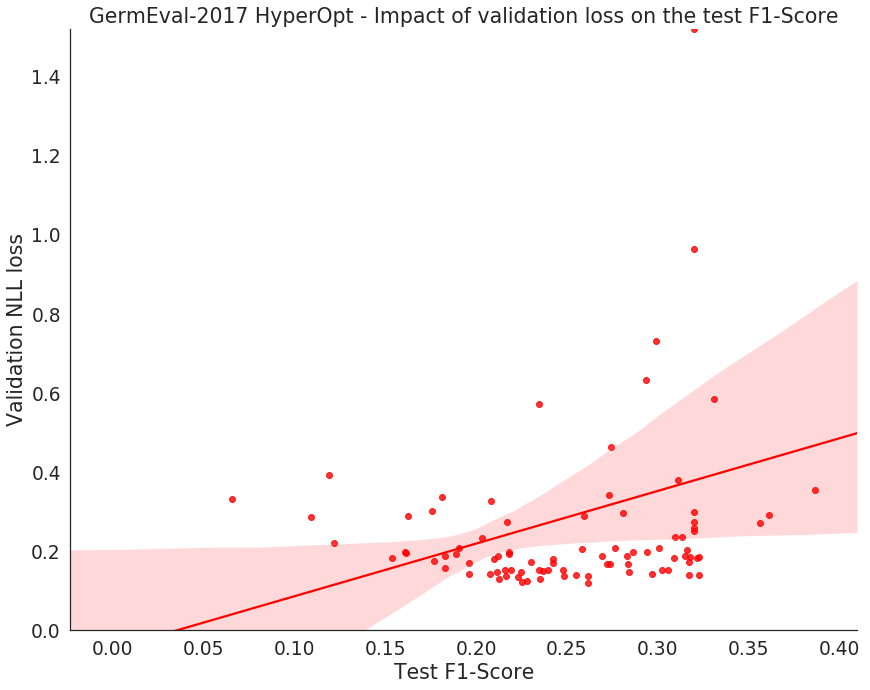

In [247]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='test f1', y='validation loss', height=10, aspect=1.25, data=df_ens, scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
plt.title('GermEval-2017 HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()
axes.set_ylim([0,1.52])
plt.ylabel('Validation NLL loss')
plt.xlabel('Test F1-Score')


plt.tight_layout()
plt.savefig(fn)

## Time and F1 Score

<Figure size 1440x720 with 0 Axes>

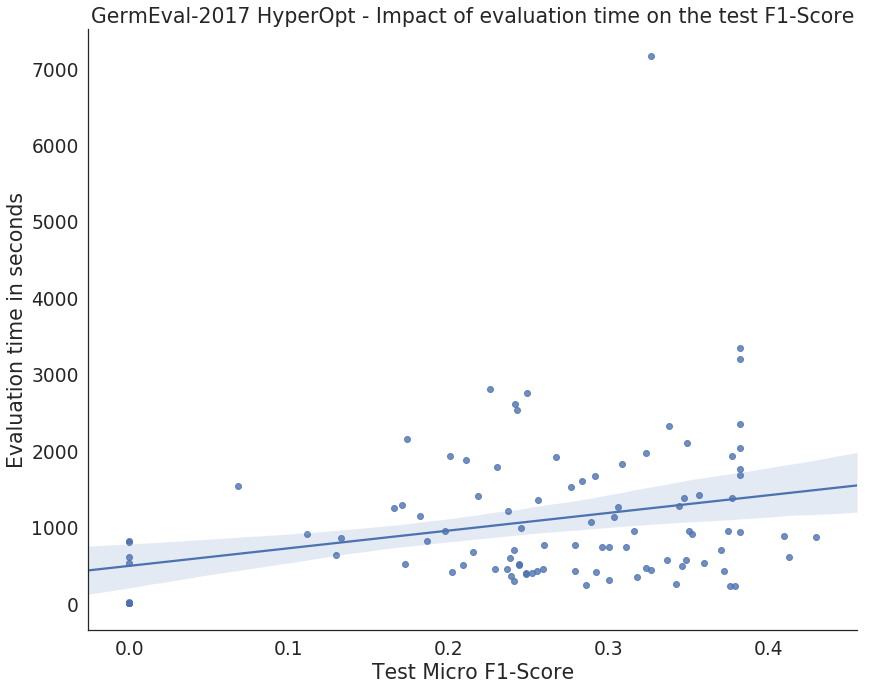

In [248]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_timef1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='validation f1', y='time', height=10, aspect=1.25, data=df_ens)
plt.title(f'{dataset_name} HyperOpt - Impact of evaluation time on the test F1-Score')
axes = plt.gca()
plt.ylabel('Evaluation time in seconds')
plt.xlabel('Test Micro F1-Score')


plt.tight_layout()
plt.savefig(fn)

# Comparison against random search

## Load random dataset
and append

In [7]:
path = os.path.join(os.getcwd(), 'logs', 'hp_run_GermEvalHyperoptRandom.pkl')
with open(path, 'rb') as f:
    trials_random = pickle.load(f)
    
pd_dict_sing = {
    'hyperopt iteration': [],
    'status': [],
    'split': [],
    'loss': [],
    'f1': [],
    'time': [],
    'algorithm': []
}
for i, r in enumerate(trials_random.results):
    for s in ['train', 'validation', 'test']:
        pd_dict_sing['algorithm'].append('Random')
        pd_dict_sing['time'].append(r['eval_time'])
        pd_dict_sing['hyperopt iteration'].append(i)
        pd_dict_sing['status'].append(r['status'])
        pd_dict_sing['split'].append(s)
        if r['status'] == STATUS_OK:
            pd_dict_sing['loss'].append(r['results'][s]['loss'])
            pd_dict_sing['f1'].append(r['results'][s]['f1'])
        else:
            pd_dict_sing['loss'].append(np.nan)
            pd_dict_sing['f1'].append(np.nan)
df_sing_rand = pd.DataFrame(pd_dict_sing)
df_sing_com = df_sing.append(df_sing_rand)


df_sing = df_sing_rand
df_sing_com

,hyperopt iteration,status,split,loss,f1,time,algorithm
0,0,ok,train,0.214588,0.314600,1974.181045,TPE
1,0,ok,validation,0.197266,0.323770,1974.181045,TPE
2,0,ok,test,0.213818,0.286336,1974.181045,TPE
3,1,ok,train,0.587789,0.377256,1935.397286,TPE
4,1,ok,validation,0.583690,0.377432,1935.397286,TPE
5,1,ok,test,0.592671,0.330922,1935.397286,TPE
6,2,ok,train,0.112538,0.267117,2764.803079,TPE
7,2,ok,validation,0.129504,0.249136,2764.803079,TPE
8,2,ok,test,0.146711,0.212655,2764.803079,TPE
9,3,ok,train,0.198166,0.246839,2611.593660,TPE


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


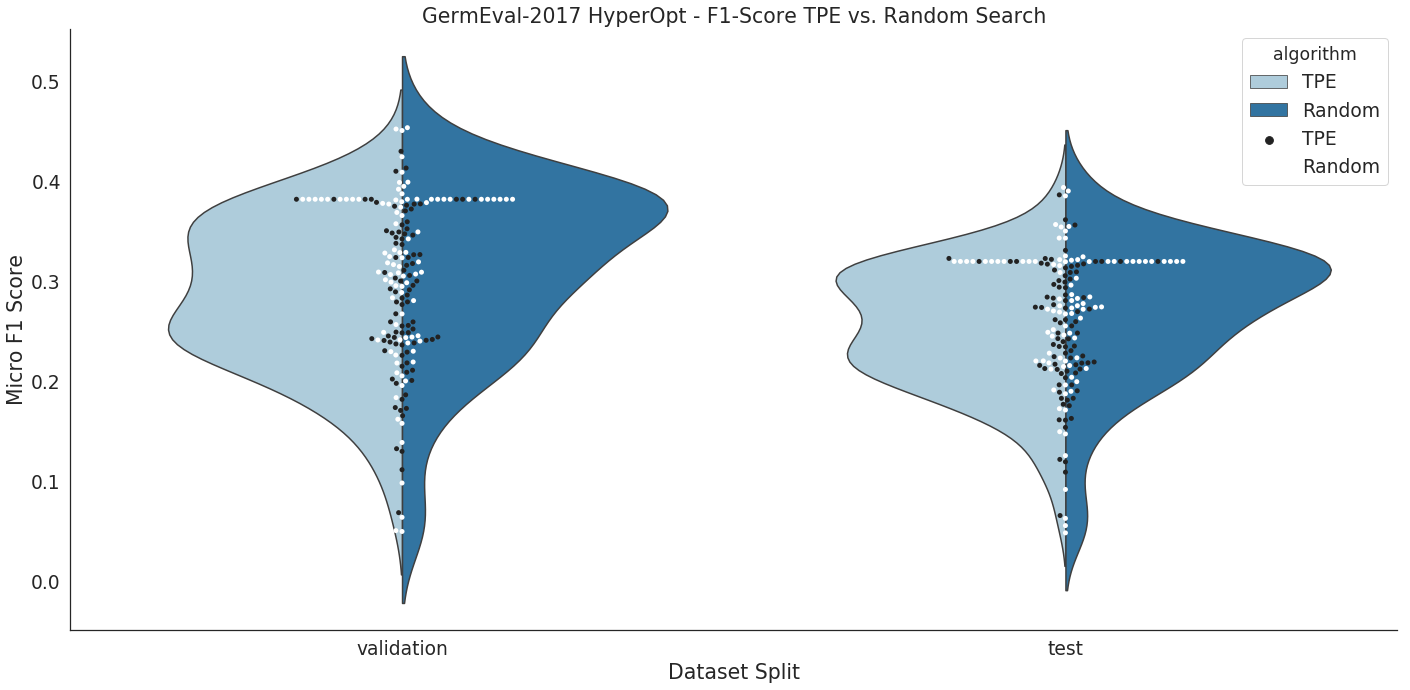

In [218]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_vio_tpeRand.pdf')
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='split', y="f1", data=df_sing_com[df_filter], hue='algorithm', palette="Paired", inner=None, split=True)
ax = sns.swarmplot(x='split', y="f1", data=df_sing_com[df_filter], hue='algorithm', color='white', edgecolor="gray")
plt.title(f'{dataset_name} HyperOpt - F1-Score TPE vs. Random Search')
#plt.legend(loc='lower left')
plt.ylabel('Micro F1 Score')
plt.xlabel('Dataset Split')

sns.despine()
plt.tight_layout()
plt.savefig(fn)


# Model parameter exploration

In [127]:
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': 0.19726594745884451,
   'status': 'ok',
   'eval_time': 1974.1810450553894,
   'best_loss': 0.19726594745884451,
   'best_f1': 0.3237704918032787,
   'sample_iterations': 119364,
   'iterations': 1764,
   'rc': <misc.run_configuration.RunConfiguration at 0x1a2c864fd0>,
   'results': {'train': {'loss': 0.2145883219079347,
     'f1': 0.31460039536853995},
    'validation': {'loss': 0.19726594745884451, 'f1': 0.3237704918032787},
    'test': {'loss': 0.2138178118566209, 'f1': 0.286335628851033}}},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'adam_beta1': [0],
    'adam_beta2': [0],
    'adam_eps': [0],
    'adam_learning_rate': [0],
    'adam_weight_decay': [0],
    'batch_size': [0],
    'clip_comments_to': [0],
    'dropout_rate': [0],
    'embedding_dim': [0],
    'embedding_name': [0],
    'embedding_type': [0],
    'harmonize_bahn': [0],
    'last_layer_dropout'

In [224]:
def append_row(result, split, model_metric, model_metric_name):
    pd_dict_sing['time'].append(r['eval_time'])
    pd_dict_sing['hyperopt iteration'].append(i)
    pd_dict_sing['status'].append(r['status'])
    pd_dict_sing['split'].append(split)
    
    pd_dict_sing['hp metric'].append(model_metric_name)
    pd_dict_sing['hp value'].append(model_metric)
    if r['status'] == STATUS_OK:
        pd_dict_sing['loss'].append(r['results'][split]['loss'])
        pd_dict_sing['f1'].append(r['results'][split]['f1'])
    else:
        pd_dict_sing['loss'].append(np.nan)
        pd_dict_sing['f1'].append(np.nan)

if dataset_name == 'GermEval-2017':
    ds_short = 'ge'
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_GermEvalHyperoptRuns.pkl')
else:
    path = os.path.join(os.getcwd(), 'logs', 'hp_run_OrganicCoarseHyperopt.pkl')
    ds_short = 'og'

with open(path, 'rb') as f:
    trials = pickle.load(f)
    
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    # pprint.pprint(trial)
    #print()
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, True if rc['use_spell_checker'][0] == 1.0 else False, 'spell checker')
        append_row(r, s, True if rc['use_stop_words'][0] == 1.0 else False, 'stop words')
        #append_row(r, s, rc['clip_comments_to'][0], 'comment clipping')

        
df = pd.DataFrame(pd_dict_sing)
df

,time,hyperopt iteration,status,split,hp metric,hp value,loss,f1
0,1974.181045,0,ok,train,spell checker,True,0.214588,0.314600
1,1974.181045,0,ok,train,stop words,True,0.214588,0.314600
2,1974.181045,0,ok,validation,spell checker,True,0.197266,0.323770
3,1974.181045,0,ok,validation,stop words,True,0.197266,0.323770
4,1974.181045,0,ok,test,spell checker,True,0.213818,0.286336
5,1974.181045,0,ok,test,stop words,True,0.213818,0.286336
6,1935.397286,1,ok,train,spell checker,False,0.587789,0.377256
7,1935.397286,1,ok,train,stop words,False,0.587789,0.377256
8,1935.397286,1,ok,validation,spell checker,False,0.583690,0.377432
9,1935.397286,1,ok,validation,stop words,False,0.583690,0.377432


In [225]:
testval_filter = (df['split'] == 'test')|(df['split'] == 'validation')
test_filter = (df['split'] == 'test')
val_filter = (df['split'] == 'validation')

## Plotting

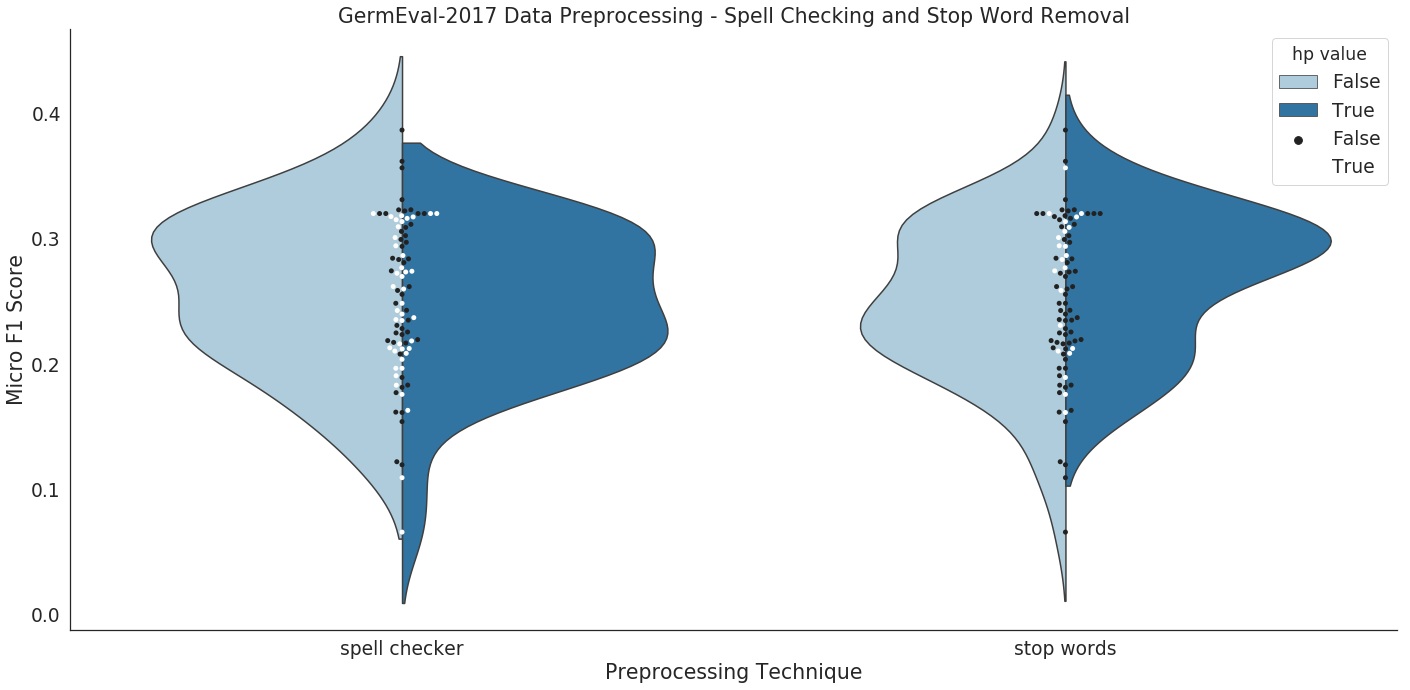

In [226]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_vio_data.pdf')
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='hp metric', y="f1", data=df[test_filter], hue='hp value', palette="Paired", inner=None, split=True)
ax = sns.swarmplot(x='hp metric', y="f1", data=df[test_filter], hue='hp value', color='white', edgecolor="gray")
plt.title(f'{dataset_name} Data Preprocessing - Spell Checking and Stop Word Removal')
#plt.legend(loc='lower left')
plt.ylabel('Micro F1 Score')
plt.xlabel('Preprocessing Technique')
sns.despine()

plt.tight_layout()
plt.savefig(fn)



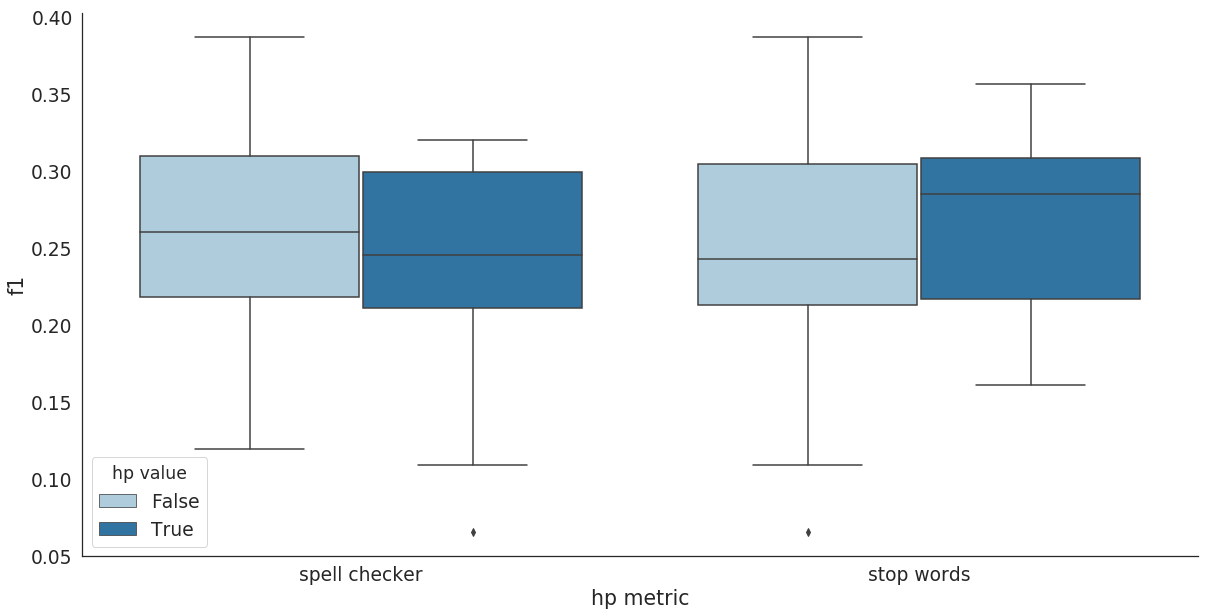

In [227]:
plt.figure(figsize=(20,10))
sns.boxplot(x='hp metric', y="f1", data=df[test_filter], hue='hp value', palette="Paired")
sns.despine()


In [132]:
y = [r['results']['validation']['f1'] for r in trials.results if r['status'] == STATUS_OK]
X = [trial['misc']['vals']['use_stop_words'] for trial in trials.trials if trial['result']['status'] == STATUS_OK]

print(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

[[1], [0], [0], [0], [1], [0], [0], [1], [1], [1], [1], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [0], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [1]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.714
Date:                 Do, 25 Apr 2019   Prob (F-statistic):              0.194
Time:                        10:51:50   Log-Likelihood:                 105.61
No. Observations:                  90   AIC:                            -20

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x720 with 0 Axes>

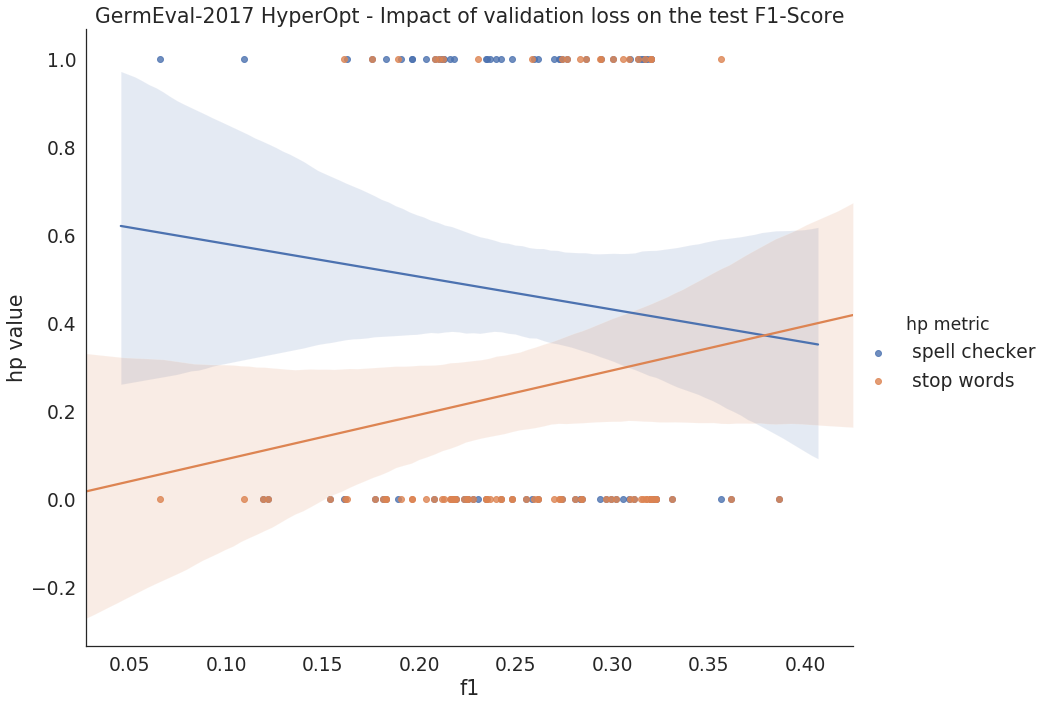

In [228]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', height=10, aspect=1.25, data=df[test_filter], hue='hp metric')
plt.title(f'{dataset_name} HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()

## Model Parameters

In [229]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['num_heads'][0]+1, 'transformer heads')


df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')
df

,time,hyperopt iteration,status,split,hp metric,hp value,loss,f1
0,1974.181045,0,ok,train,transformer heads,4,0.214588,0.314600
1,1974.181045,0,ok,validation,transformer heads,4,0.197266,0.323770
2,1974.181045,0,ok,test,transformer heads,4,0.213818,0.286336
3,1935.397286,1,ok,train,transformer heads,5,0.587789,0.377256
4,1935.397286,1,ok,validation,transformer heads,5,0.583690,0.377432
5,1935.397286,1,ok,test,transformer heads,5,0.592671,0.330922
6,2764.803079,2,ok,train,transformer heads,4,0.112538,0.267117
7,2764.803079,2,ok,validation,transformer heads,4,0.129504,0.249136
8,2764.803079,2,ok,test,transformer heads,4,0.146711,0.212655
9,2611.593660,3,ok,train,transformer heads,1,0.198166,0.246839


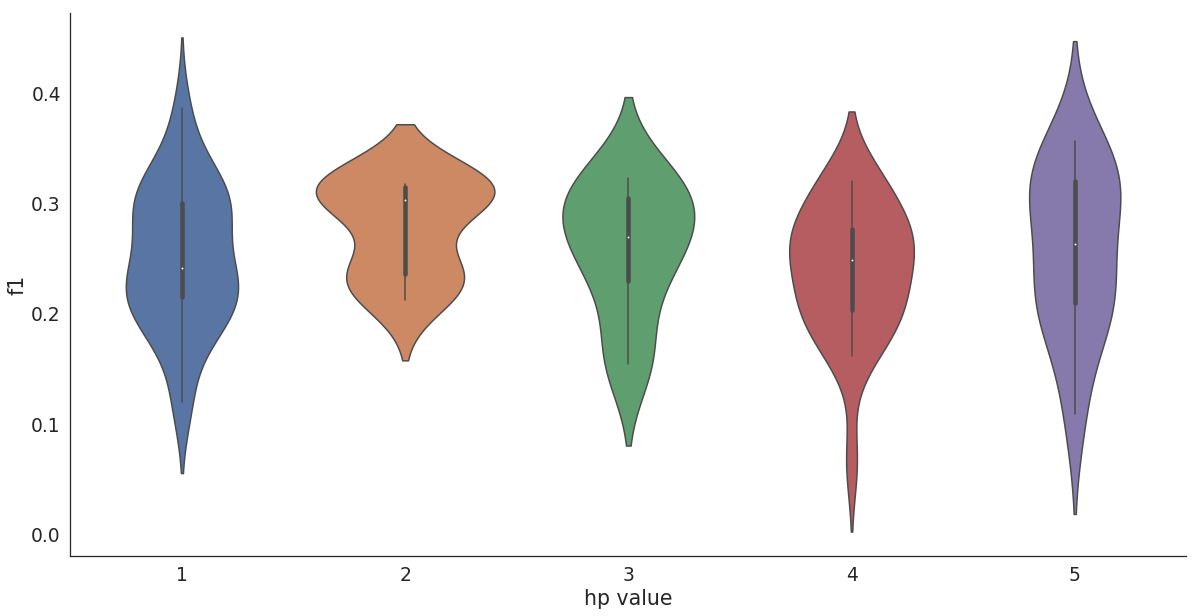

In [230]:
plt.figure(figsize=(20,10))
sns.violinplot(x='hp value', y="f1", data=df[test_filter])
sns.despine()

In [136]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['dropout_rate'][0], 'Transformer Dropout')
        append_row(r, s, rc['last_layer_dropout'][0], 'Output Dropout')


        
df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')



<Figure size 1440x720 with 0 Axes>

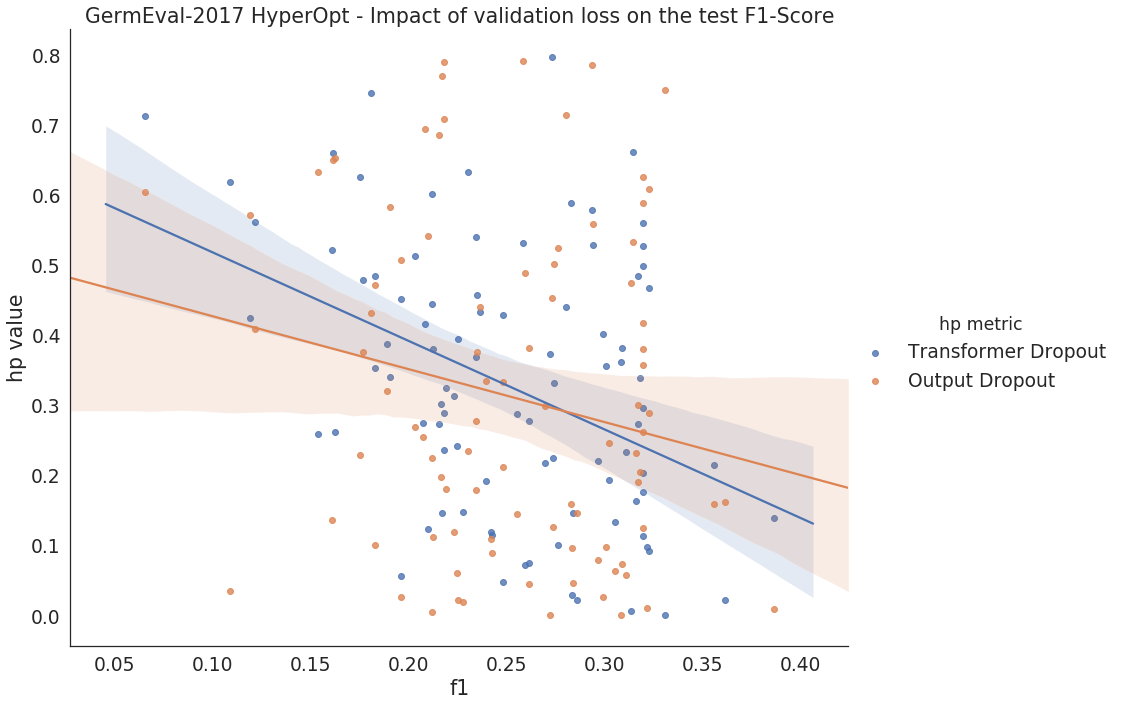

In [137]:
fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', hue='hp metric', height=10, aspect=1.25, data=df[test_filter], robust=True)
plt.title(f'{dataset_name} HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()

<Figure size 1440x720 with 0 Axes>

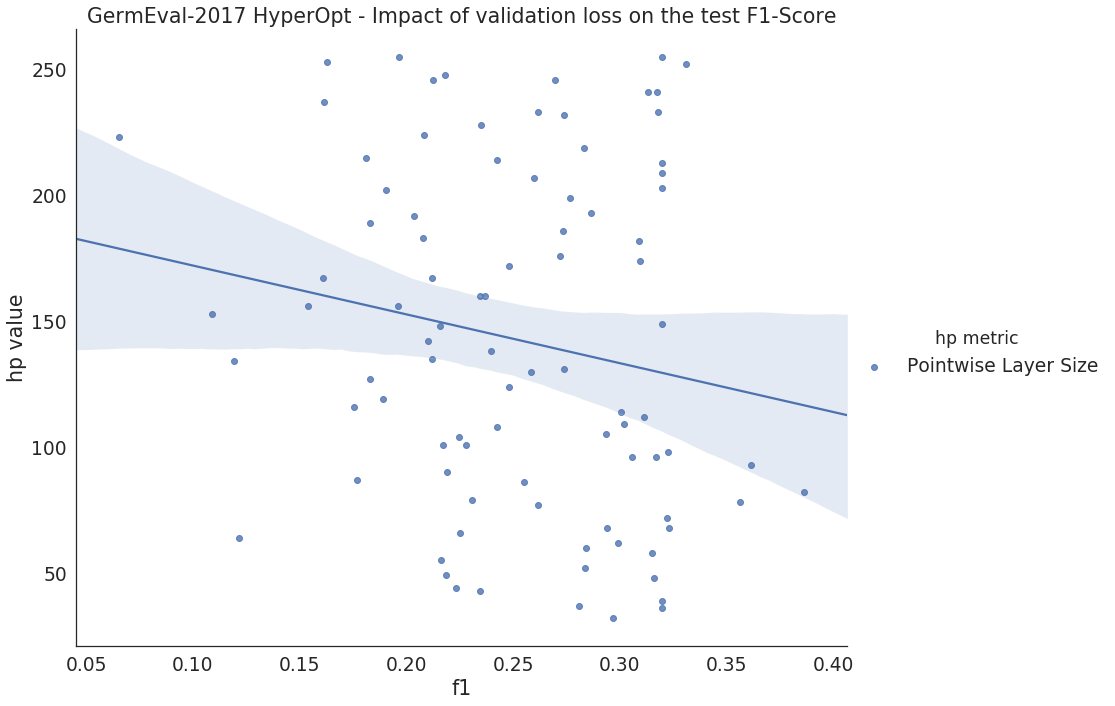

In [138]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['pointwise_layer_size'][0], 'Pointwise Layer Size')

        
df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', hue='hp metric', height=10, aspect=1.25, data=df[test_filter], robust=True)
plt.title(f'{dataset_name} HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()

<Figure size 1440x720 with 0 Axes>

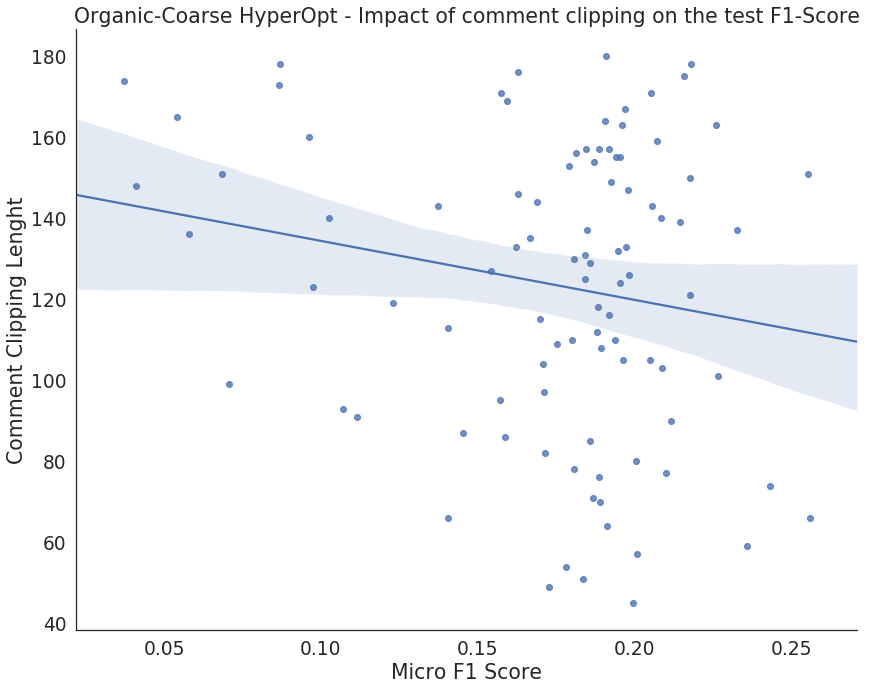

In [206]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['clip_comments_to'][0], 'Comment Clipping')

        
df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_commentClipping_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', hue='hp metric', height=10, aspect=1.25, data=df[test_filter], robust=True, legend=False)
plt.title(f'{dataset_name} HyperOpt - Impact of comment clipping on the test F1-Score')
plt.ylabel('Comment Clipping Lenght')
plt.xlabel('Micro F1 Score')
axes = plt.gca()

plt.tight_layout()
plt.savefig(fn)

In [207]:
y = [r['results']['test']['f1'] for r, t in zip(trials.results, trials.trials) if r['status'] == STATUS_OK]
X = [t['misc']['vals']['clip_comments_to'] for t in trials.trials if t['result']['status'] == STATUS_OK]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.339
Date:                 Do, 25 Apr 2019   Prob (F-statistic):             0.0709
Time:                        16:44:51   Log-Likelihood:                 160.43
No. Observations:                  95   AIC:                            -316.9
Df Residuals:                      93   BIC:                            -311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2031      0.016     12.350      0.0

<Figure size 1440x720 with 0 Axes>

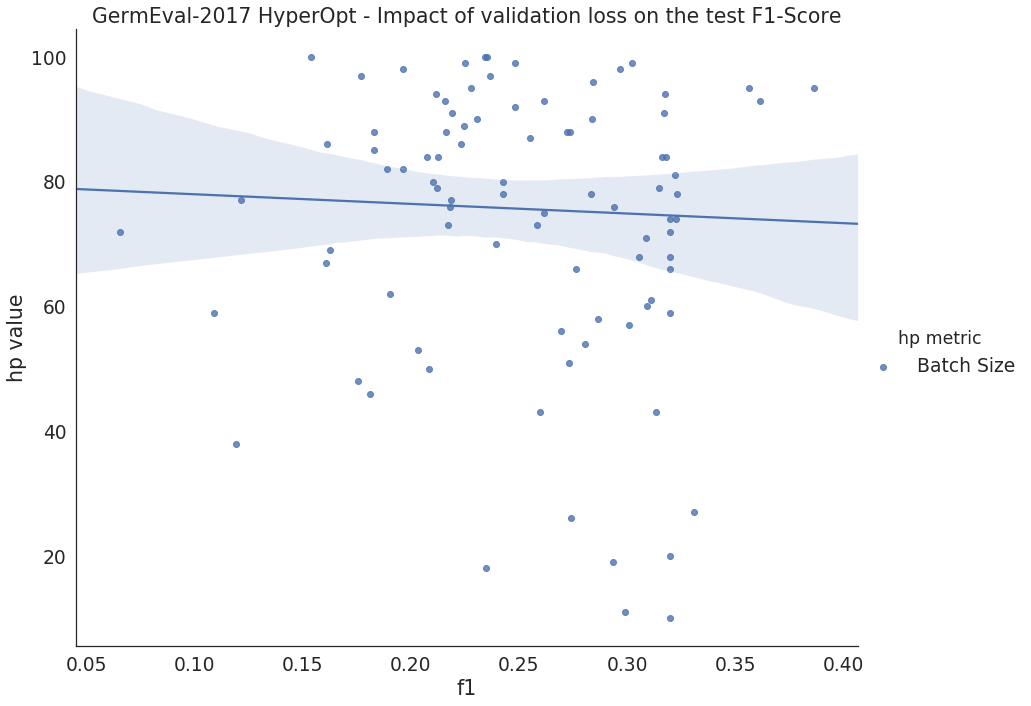

In [140]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['batch_size'][0], 'Batch Size')

        
df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', hue='hp metric', height=10, aspect=1.25, data=df[test_filter], robust=True)
plt.title(f'{dataset_name} HyperOpt - Impact of validation loss on the test F1-Score')
axes = plt.gca()

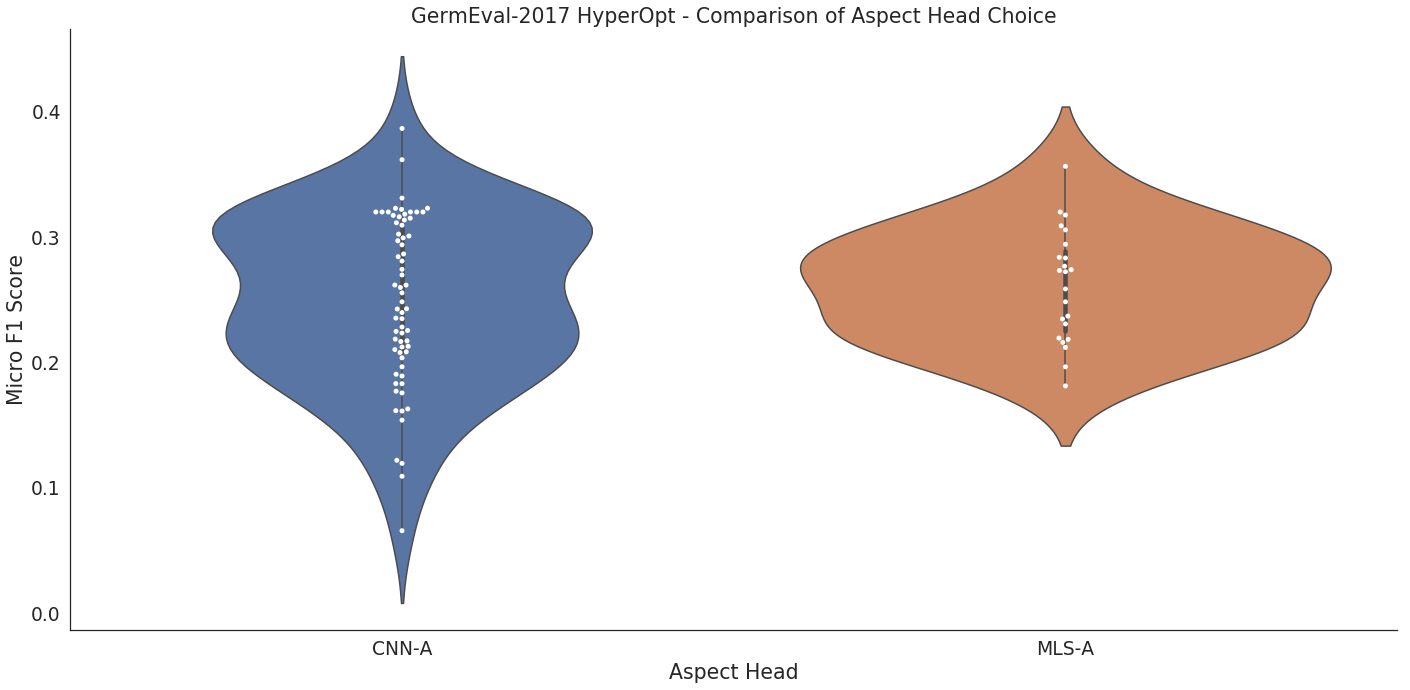

In [187]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, 'MLS-A' if rc['output_layer'][0] == 1.0 else 'CNN-A', 'Output Layer')

        
df = pd.DataFrame(pd_dict_sing)

test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_vio_aspectHead_test.pdf')
plt.figure(figsize=(20,10))

sns.violinplot(x='hp value', y="f1", data=df[test_filter])
sns.swarmplot(x='hp value', y="f1", data=df[test_filter], color='white', edgecolor="gray")


plt.title(f'{dataset_name} HyperOpt - Comparison of Aspect Head Choice')
axes = plt.gca()
sns.despine()
plt.ylabel('Micro F1 Score')
plt.xlabel('Aspect Head')
plt.tight_layout()
plt.savefig(fn)

In [177]:
df[test_filter][:10].groupby('hp value').describe()['f1'][['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
hp value,,,,,
CNN-A,2.0,0.203513,0.011606,0.195307,0.211720
MLS-A,7.0,0.181207,0.029239,0.140397,0.209936


In [178]:
df[test_filter][11:].groupby('hp value').describe()['f1'][['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
hp value,,,,,
CNN-A,14.0,0.189632,0.025943,0.154229,0.255924
MLS-A,71.0,0.169440,0.050050,0.037096,0.255319


In [144]:
df[test_filter].groupby('hp value').describe()['f1'][['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
hp value,,,,,
CNN-A,67.0,0.249094,0.066835,0.065565,0.386465
MLS-A,23.0,0.261533,0.044603,0.181078,0.356296


In [145]:
print(df[test_filter][:10].groupby('hp value').describe()['f1'][['count', 'mean', 'std', 'min', 'max']].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  count &      mean &       std &       min &       max \\
hp value &        &           &           &           &           \\
\midrule
CNN-A    &    6.0 &  0.267644 &  0.050316 &  0.212655 &  0.330922 \\
MLS-A    &    3.0 &  0.294608 &  0.032134 &  0.258432 &  0.319838 \\
\bottomrule
\end{tabular}



<Figure size 1440x720 with 0 Axes>

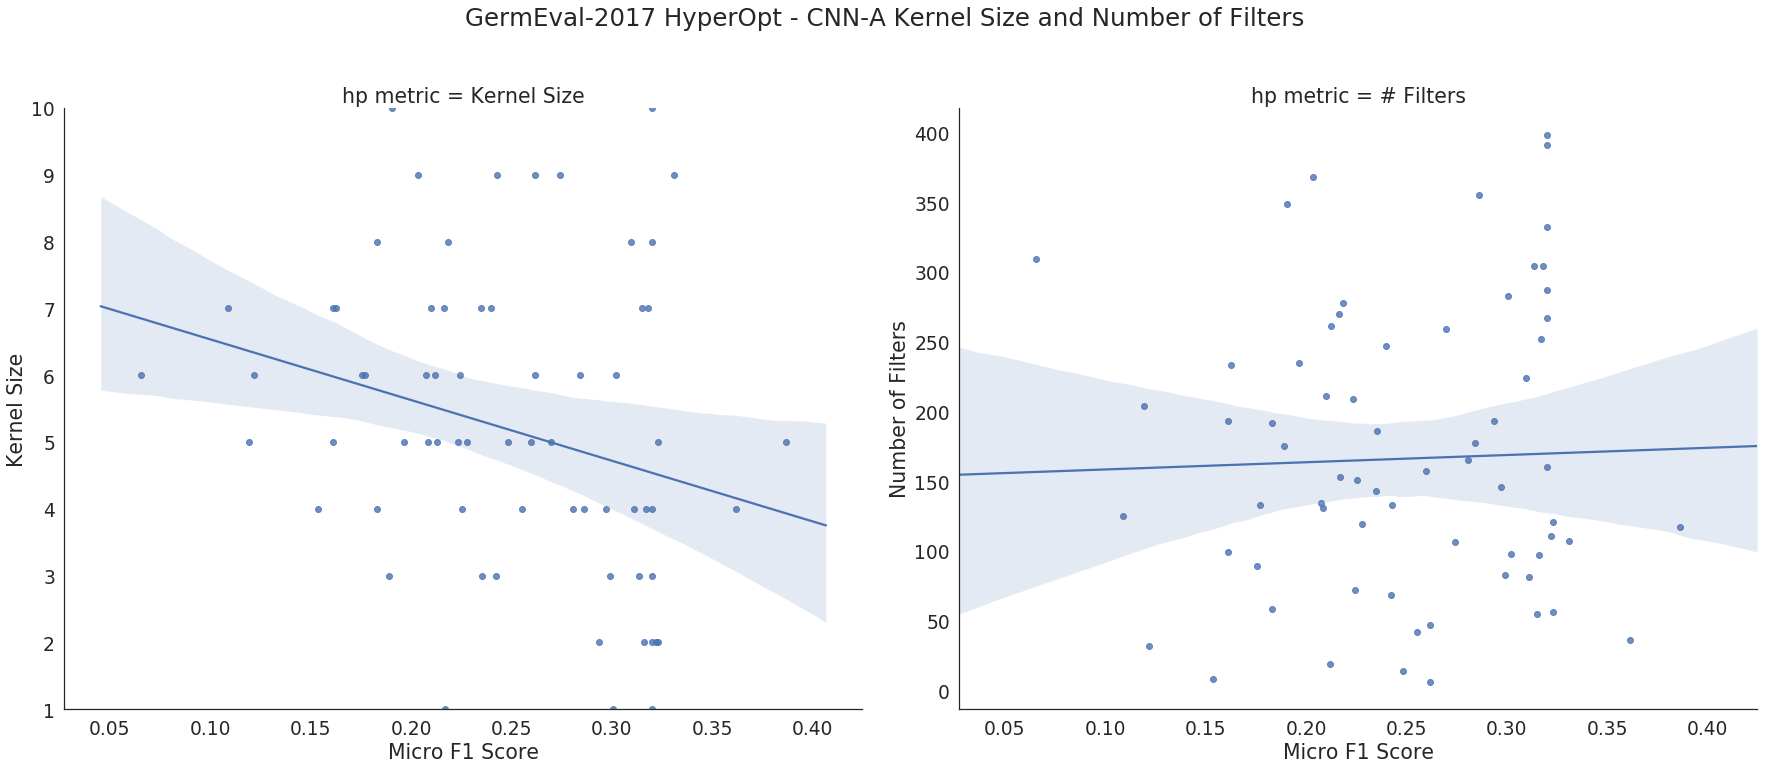

In [186]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']
        
        if rc['output_layer'][0] == 1.0:
            continue

        append_row(r, s, rc['output_conv_kernel_size'][0], 'Kernel Size')
        append_row(r, s, rc['output_conv_num_filters'][0], '# Filters')
        
df = pd.DataFrame(pd_dict_sing)

test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_cnnParams_test.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='f1', y='hp value', col='hp metric', sharey=False, height=10, aspect=1.25, data=df[test_filter], robust=True)

#plt.title(f'{dataset_name} HyperOpt - CNN-A Kernel Size')


axes = plt.gcf().get_axes()
axes[0].set_ylabel('Kernel Size')
axes[0].set_ylim([1, 10])
axes[1].set_ylabel('Number of Filters')


for a in axes:
    a.set_xlabel('Micro F1 Score')
    
suptitle = plt.suptitle(f'{dataset_name} HyperOpt - CNN-A Kernel Size and Number of Filters', y=1.08)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig(fn, bbox_extra_artists=(suptitle,), bbox_inches="tight")

In [171]:
y = [r['results']['validation']['f1'] for r, t in zip(trials.results, trials.trials) if r['status'] == STATUS_OK and t['misc']['vals']['output_layer'][0] != 1.0]
X = [t['misc']['vals']['output_conv_kernel_size'] for t in trials.trials if t['result']['status'] == STATUS_OK and t['misc']['vals']['output_layer'][0] != 1.0]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

[[4.0], [9.0], [5.0], [8.0], [7.0], [9.0], [2.0], [6.0], [1.0], [2.0], [4.0], [5.0], [6.0], [5.0], [7.0], [7.0], [3.0], [5.0], [6.0], [8.0], [10.0], [4.0], [3.0], [6.0], [7.0], [9.0], [4.0], [8.0], [10.0], [5.0], [7.0], [6.0], [9.0], [1.0], [3.0], [7.0], [5.0], [4.0], [5.0], [6.0], [5.0], [6.0], [5.0], [4.0], [4.0], [2.0], [3.0], [4.0], [6.0], [2.0], [8.0], [1.0], [3.0], [7.0], [5.0], [4.0], [6.0], [4.0], [5.0], [7.0], [6.0], [2.0], [5.0], [4.0], [3.0], [7.0], [9.0]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     4.636
Date:                 Do, 25 Apr 2019   Prob (F-statistic):             0.0350
Time:                        11:35:15   Log-Likelihood:                 75.305
No. Observations:                  67   AIC:          

<Figure size 1440x720 with 0 Axes>

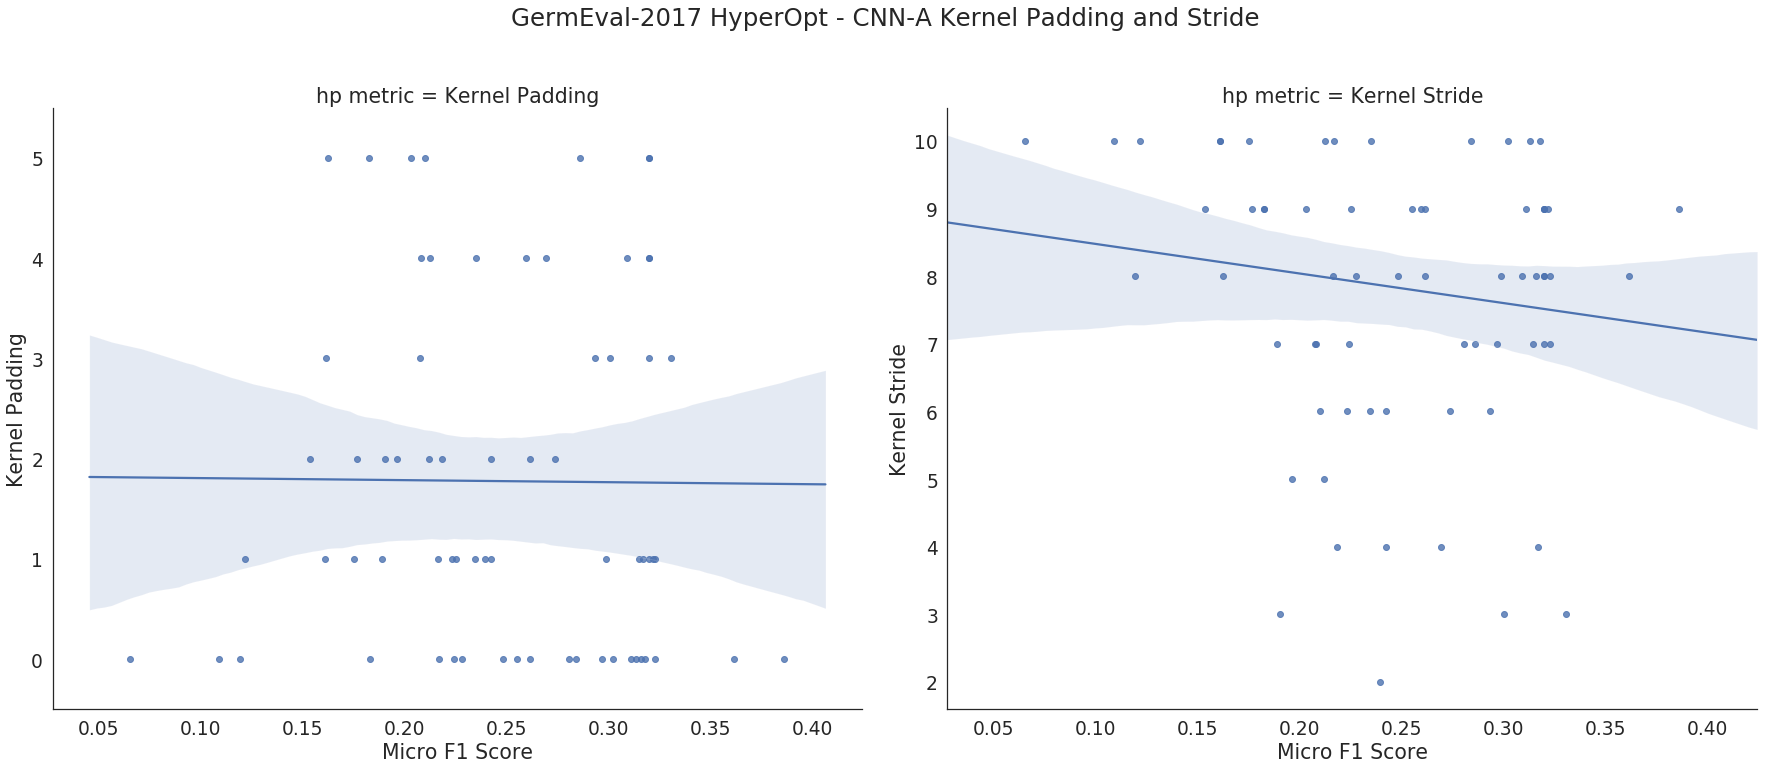

In [191]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']
        
        if rc['output_layer'][0] == 1.0:
            continue

        append_row(r, s, rc['output_conv_padding'][0], 'Kernel Padding')
        append_row(r, s, rc['output_conv_stride'][0], 'Kernel Stride')
        
df = pd.DataFrame(pd_dict_sing)

test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_cnnParams2_test.pdf')
plt.figure(figsize=(20,10))

sns.lmplot(x='f1', y='hp value', col='hp metric', sharey=False, height=10, aspect=1.25, data=df[test_filter], robust=True)

#plt.title(f'{dataset_name} HyperOpt - CNN-A Kernel Size')


axes = plt.gcf().get_axes()
axes[0].set_ylabel('Kernel Padding')
axes[0].set_ylim([-0.5, 5.5])
axes[1].set_ylabel('Kernel Stride')


for a in axes:
    a.set_xlabel('Micro F1 Score')
    
suptitle = plt.suptitle(f'{dataset_name} HyperOpt - CNN-A Kernel Padding and Stride', y=1.08)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig(fn, bbox_extra_artists=(suptitle,), bbox_inches="tight")

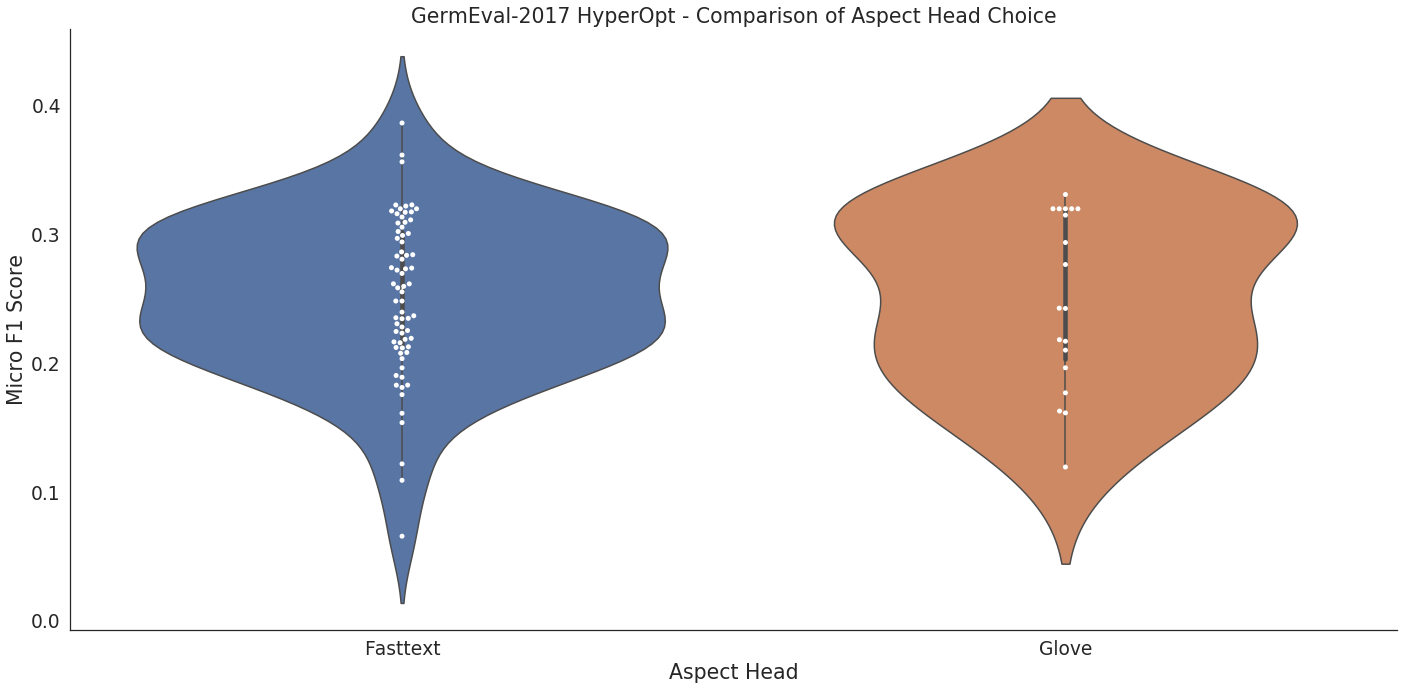

In [192]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, 'Glove' if rc['embedding_type'][0] == 1.0 else 'Fasttext', 'Embedding Type')

        
df = pd.DataFrame(pd_dict_sing)

test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_vio_embedding_test.pdf')
plt.figure(figsize=(20,10))

sns.violinplot(x='hp value', y="f1", data=df[test_filter])
sns.swarmplot(x='hp value', y="f1", data=df[test_filter], color='white', edgecolor="gray")


plt.title(f'{dataset_name} HyperOpt - Comparison of Aspect Head Choice')
axes = plt.gca()
sns.despine()
plt.ylabel('Micro F1 Score')
plt.xlabel('Aspect Head')
plt.tight_layout()
plt.savefig(fn)

<Figure size 1440x720 with 0 Axes>

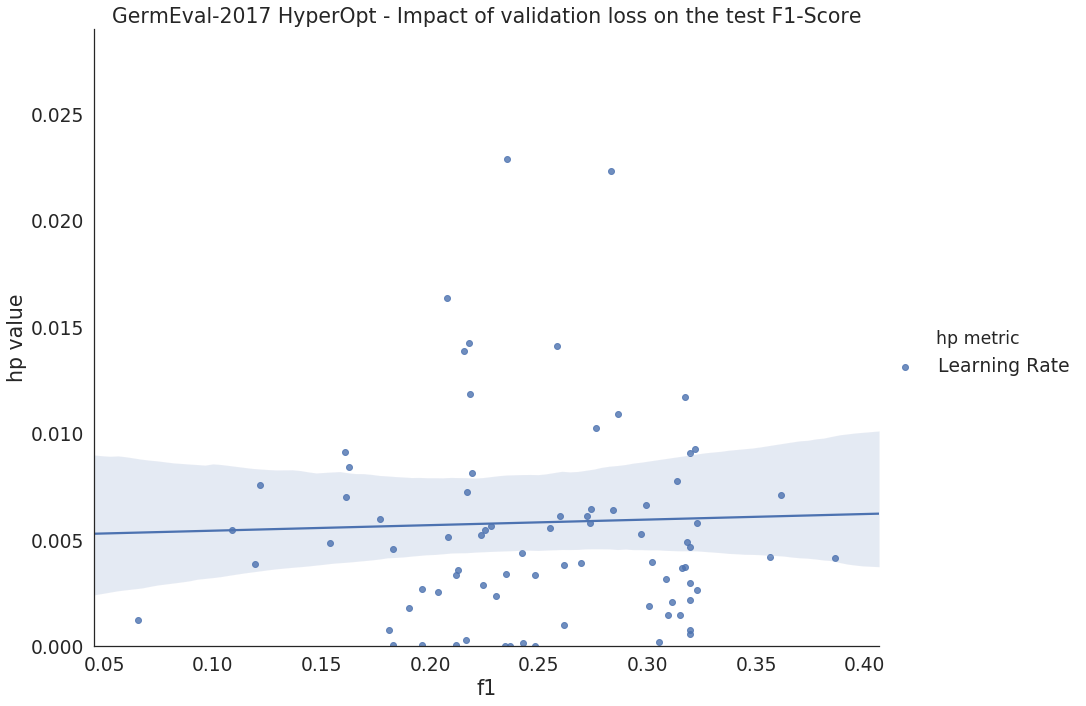

In [196]:
pd_dict_sing = defaultdict(list)
for i, (r, trial) in enumerate(zip(trials.results, trials.trials)):
    for s in ['train', 'validation', 'test']:
        rc = trial['misc']['vals']

        #append_row(r, s, rc['batch_size'][0], 'batch size')
        append_row(r, s, rc['adam_learning_rate'][0], 'Learning Rate')

        
df = pd.DataFrame(pd_dict_sing)
test_filter = (df['split'] == 'test')


fn = os.path.join(fig_save_path, f'06_hp_{ds_short}_lm_lossf1_test.pdf')
plt.figure(figsize=(20,10))
sns.lmplot(x='f1', y='hp value', hue='hp metric', height=10, aspect=1.25, data=df[test_filter], robust=True)
plt.title(f'{dataset_name} HyperOpt - Impact of validation loss on the test F1-Score')
plt.ylim([0, 0.029])
axes = plt.gca()

# Best Results

In [8]:
df_sing_rand.groupby('split')['f1'].describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,94.0,0.270115,0.071132,0.048230,0.223229,0.281491,0.319838,0.393874
train,94.0,0.332826,0.132207,0.047785,0.249808,0.329777,0.377302,0.869530
validation,94.0,0.312220,0.088741,0.049618,0.246314,0.326477,0.382055,0.453674


In [9]:
df_sing.groupby('split')['f1'].describe()

,count,mean,std,min,25%,50%,75%,max
split,,,,,,,,
test,94.0,0.270115,0.071132,0.048230,0.223229,0.281491,0.319838,0.393874
train,94.0,0.332826,0.132207,0.047785,0.249808,0.329777,0.377302,0.869530
validation,94.0,0.312220,0.088741,0.049618,0.246314,0.326477,0.382055,0.453674


# Get hp of best trial

In [24]:
best_trial = None
best_f1 = 0
for t in trials_random.trials:
    if t['result']['status'] != 'ok':
        continue
    if best_f1 < t['result']['best_f1']:
        best_f1 = t['result']['best_f1']
        best_trial = t
        print(best_f1)
        
print(best_trial['result']['rc'])

0.33144535347178516
0.38205453392517436
0.45082938388625593
0.4536741214057508
+----------------------------------------------------------------------------------+
|                                 Hyperparameters                                  |
+------------------------------+---------------------------------------------------+
|          Parameter           |                       Value                       |
+------------------------------+---------------------------------------------------+
|            kwargs            | {'batch_size': 26.0, 'learning_rate_sche[...]lse} |
|          model_size          |                        300                        |
|        early_stopping        |                         5                         |
|           use_cuda           |                        True                       |
|             task             |                      germeval                     |
|          batch_size          |                         26            